# Week 6 Activity: STFT and Spectral Features

Complete this activity as part of your participation grade. Pending length of the lecture, you will have time in class to work. Everything you need to complete this activity can be found in this week's (or a previous week's) lecture code.

In [1]:
import numpy as np
from scipy.io.wavfile import read
from scipy import signal
from librosa import feature, load, frames_to_time
import matplotlib.pyplot as plt

## Windowing and STFT

Compute the DFT of an "on bin" (integer bin) sinusoid and plot.

Compute the DFT of an off bin sinusoid and plot.

Apply a hanning window to both sinusoids and recompute the DFT and plot.

Apply a blackman harris window to both sinusoids and recompute the DFT and plot.

Describe what happened in all of the above cases. What happened to the frequency resolution, was their leakage, what do the side/main lobes look like?

## Applying the STFT

Apply the STFT (use scipy.stft) to one of the files listed below, then graph the spectrogram.
- 'BobMarley_track1.wav'
- 'MilesDavis_track2.wav'
- 'Radiohead_track3.wav'
- 'TheBlackKeys_track4.wav'

See what happens when you change:
- the frame size (nperseg)
- the window type
- the amount of overlap
- the amount of padding (nfft)

## STFT Pseudo Code

For HW3, you will write your own STFT function. To get you started on that process, write out the pseudocode for the STFT. You should expect similar inputs to the scipy.stft function.

## Spectral Features

Using the `librosa.feature` functions, calculate the various features below as described.

**Choose two of the four tracks below** and use the same pair of tracks for each feature extraction activity.
- 'BobMarley_track1.wav'
- 'MilesDavis_track2.wav'
- 'Radiohead_track3.wav'
- 'TheBlackKeys_track4.wav'

### Bandwidth
Look up the function documentation [here](https://librosa.org/doc/0.8.0/generated/librosa.feature.spectral_bandwidth.html).

For Track (a) and Track (b), calculate the bandwidth using the `spectral_bandwidth` function. Compare the change in output for both (a) and (b) using two different FFT sizes in your STFT: one relatively small, and the other relatively large.

Plot your results for each by plotting the normalized audio and normalized feature on top of each other. (You may do this using the `frames_to_time` function if you wish.) Your graph output should be a 4x4 grid (2 songs, 2 different FFT sizes).

In [ ]:
(fs, a) = read('../uploaded_files/BobMarley_track1.wav')
(fs2, b) = read('../uploaded_files/Radiohead_track3.wav')
print(fs, fs2)

a = a.astype(float)
b = b.astype(float)


96000 44100


Always check the sampling rates - you want to make sure that you are using the same sampling rate when making comparisons. If they are not the same, you will need to downsample the ones that are too high (or, alternatively, downsample all of them so that they are 22.05kHz). One way is to use `librosa` to read in the files - it has an argument for you to specify the sample rate you want:

In [ ]:
# the 'load' package from librosa was already installed 
# note that librosa saves the sample rate and data in the opposite order
(data, fs) = load('../uploaded_files/BobMarley_track1.wav', sr=44100)#note that 22050 is the default for the "load" function
print(fs, data.shape)

(1322922,)

The other way is via the `signal.resample` function from `scipy`. Be careful if you choose to do it this way since the sample rate you saved when loading is no longer the correct sample rate. When the sample rate is 96kHz, it's a bit tricky this way:

In [ ]:
#First, read in as usual:
(fs, a) = read('../uploaded_files/BobMarley_track1.wav')
#Then, downsample:
#size of original in s:
t = a.size/fs
#length of samples you would have with 44.1kHz (desired) sample rate:
newl = int(np.ceil(t*44100)) #must be integer number of samples
ads = signal.resample(a, newl).astype(float) #signal to resample, total samples in new output 
print(ads.shape)

(1322922,)


In [ ]:
sb_a1 = feature.spectral_bandwidth(y=ads, sr=fs, n_fft=4096, hop_length=2048)[0]
sb_a2 = feature.spectral_bandwidth(y=ads, sr=fs, n_fft=512, hop_length=256)[0]

sb_b1 = feature.spectral_bandwidth(y=b, sr=fs, n_fft=4096, hop_length=2048)[0]
sb_b2 = feature.spectral_bandwidth(y=b, sr=fs, n_fft=512, hop_length=256)[0]

print(sb_a1.shape, sb_a2.shape, sb_b1.shape, sb_b2.shape) #check to ensure similar num of windows

(646,) (5168,) (648,) (5181,)


In [ ]:
def normalize(x):
    n = x/abs(x.max())
    return(n)

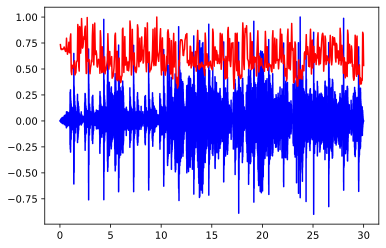

In [ ]:
frames1 = range(len(sb_a1))
t1 = frames_to_time(frames1, sr=44100, hop_length=2048, n_fft=4096)
n_sba1 = normalize(sb_a1) #normalize sb values
time = np.arange(0, ads.size/44100, 1/44100)
n_a = normalize(ads) #normalize audio
plt.plot(time, n_a, 'b', t1, n_sba1, 'r');
#plt.plot(t1,n_sba1)

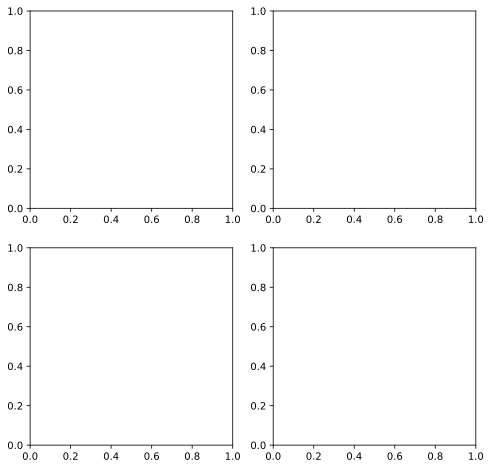

In [ ]:


(fig, ax) = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot()

For discussion: Listen to each track. What timbral features of the track are obviously different? What, if anything, might affect the decision to use a short or long FFT size? Keep in mind you would have to use the same FFT size for all tracks you want to compare (otherwise you are comparing apples and oranges!)

### Spectral Centroid
Look up the function documentation [here](https://librosa.org/doc/0.8.0/generated/librosa.feature.spectral_centroid.html).

For Track (a) and Track (b), calculate the bandwidth using the `spectral_centroid` function. Compare the change in output for both (a) and (b) using a fixed FFT size of your choice but two different FFT overlaps: one with no overlap, and the other with 50% overlap.

Plot your results for each by plotting the normalized audio and normalized feature on top of each other. (You may do this using the `frames_to_time` function if you wish.) Your graph output should be a 4x4 grid (2 songs, 2 different hop sizes).

For discussion: What, if anything, changes as a result of changing the hop size? Is it predictable?

### Mel Frequency Cepstrum Coefficients (MFCCS)

Look up the function documentation [here](https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html).

Calculate the MFCCs for Track (a) and Track (b). Make two plots of the output: (1) set the n_mfcc parameter to 12, and (2) to 20. Again you should have a total of 4 plots. 
